# Statistics with python
- Descriptive stats (today and tomorrow): Summary stats with python (mean, std, sem, CI, median, percentiles, IQR), statistical plots (hist, boxplot, violin)
- Inferential stats (Wednesday): Hypothesis testing (parametric/nonparametric, paired/unpaired, two-sided/one-sided, Anova)

`scipy.stats` and numpy cover the basics. For more complex stats use the python package [statsmodels](https://www.statsmodels.org/stable/index.html) or the R-language.


In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

plt.style.use('ncb.mplstyle')

# Probability distributions
Experimental measurements help to draw general conclusions and to derive rules from the investigated interactions of parameters and measured features:
One parameter is varied (e.g. an electrical current stimulus on a neuron), while the resulting effect on a feature is measured (e.g. the firing rate of a neuron).

This would be rather simple if the measured feature would always be the same for a given parameter change. However, in reality this is not the case: Measurements are variable, because even under controlled experimental conditions, one can never control _ALL_ factors that might influence the result. For example, in a behavioral animal experiment, the animal might show different reactions due to being sick, tired or hungry, independently of a well-controlled task. Even if there is a clear dependence between the varied parameters and the measured feature, the feature values willl aways be scattered around the expected value.

## Visualizing the frequency distribution of your data using histograms
The frequency distribution describes how often a measured value occurs and serves to estimate the probability of that measured value.
We estimate the frequency distribition using a histograms, which can be used to derive the underlying probability density function.

Histograms show how many of the measured feature values occurred in defined, contiguous ranges (contiguous means that there is no gap between ranges). Each of those ranges (also called "classes" or "bins") is represented graphically by a rectangle (or bar). The bar’s height represents the measured frequency (number of samples falling into each bin). The choice off the number and borders of the bins depends on the data, the sample size, and the scientific question. More samples allow more bins and more details. If too many bins are used for a given sample size, some of the bins will by chance be empty, making it difficult to judge the shape of the frequency distribution. 

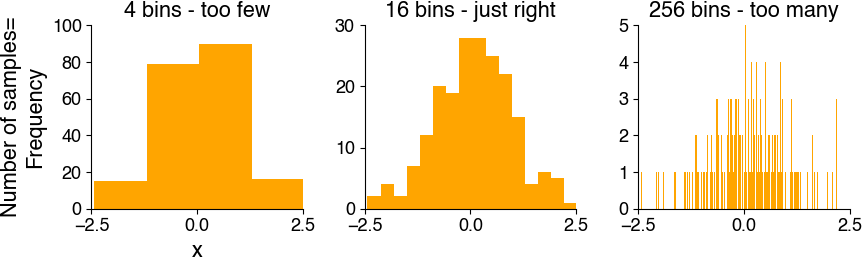

In [18]:
# HIDE
np.random.seed(1)  # for reproducibility
x = np.random.randn((200))  # generate 200 random numbers with standard normal distribion (mean 0, std 1)

# different ways of plotting histograms
plt.figure(figsize=(9, 3))
ax = plt.subplot(131)
plt.hist(x, bins=4, color='orange')
plt.ylabel('Number of samples=\nFrequency')
plt.xlabel('x')
plt.title('4 bins - too few')
plt.xlim(-2.5, 2.5)

plt.subplot(132, sharex=ax)
plt.hist(x, bins=16, color='orange')
plt.title('16 bins - just right')

plt.subplot(133, sharex=ax)
plt.hist(x, bins=256, color='orange')
plt.title('256 bins - too many')

plt.tight_layout()
plt.savefig('fig/5.01_probabilities1.png')
plt.show()

## Probability density function
In contrast to the frequency distribution, which contains the absolute number of occurrences of feature values in specified classes, the probability density function indicates probabilities for the occurrence of specific feature values. For continuous numerical data, you could imagine first scaling a histogram to relative rather than absolute numbers of occurrences (i.e. giving percentages of occurrences – which refer directly to probabilities). Then, you make the bins of the scaled histogram finer and finer. In consequence, the probability for each class will also get smaller and smaller. If you continue to an infinite number of bins, each bin would have an near-zero probability, because it is very unlikely that your dataset contains samples with that exact feature value. However, the probability to find a person that is 1.70 m tall _is indeed_ higher than the probability to find a person of 2.20 m (or even 2.50 m)! The probability density function reflects that: The area under the curve is scaled to 1, typically making all values pretty small, but nevertheless clearly >0 in ranges where feature values can be found. Contiguous probability values from data is obtained by binning the data in a histogram and assuming that the true probability density is more or less constant for all feature values falling in that bin. 

![](fig/5.01_probabilities_density.png)

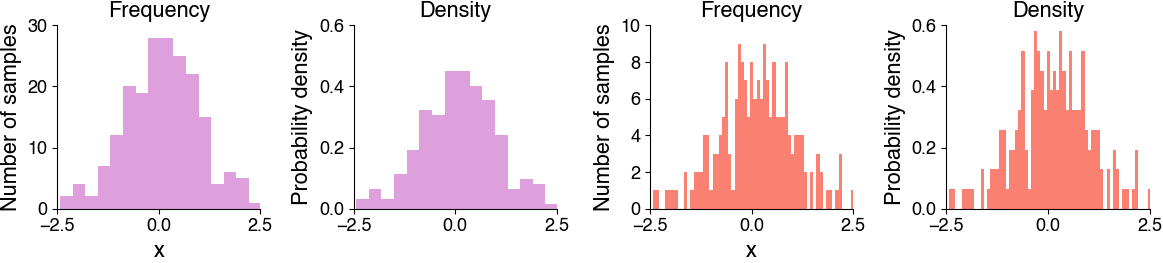

In [5]:
np.random.seed(1)  # for reproducibility
x = np.random.randn((200))  # generate 200 random numbers with standard normal distribion (mean 0, std 1)
# different ways of plotting histograms
plt.figure(figsize=(12, 3))
plt.subplot(141)
plt.hist(x, bins=16, color='plum')
plt.ylabel('Number of samples')
plt.title('Frequency')
plt.xlabel('x')
plt.xlim(-2.5, 2.5)

plt.subplot(142)
plt.hist(x, bins=16, color='plum', density=True)
plt.ylabel('Probability density')
plt.title('Density')
plt.ylim(0, 0.6)
plt.xlim(-2.5, 2.5)

plt.subplot(143)
plt.hist(x, bins=64, color='Salmon')
plt.ylabel('Number of samples')
plt.title('Frequency')
plt.xlabel('x')
plt.xlim(-2.5, 2.5)

plt.subplot(144)
plt.hist(x, bins=64, color='Salmon', density=True)
plt.ylabel('Probability density')
plt.title('Density')
plt.ylim(0, 0.6)
plt.xlim(-2.5, 2.5)

plt.tight_layout()

plt.savefig('fig/5.01_probabilities_density.png')


## Histograms in python
In python, we can plot a histogram using `plt.hist`:

`n, bins, patches = plt.hist(x, bins, density)` ([docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html))

Arguments:

- `x`: your data as a list or numpy array
- `bins`: Optional. Number of bins or position of bin edges (defaults to 10 bins with the bin edges chosen based on the data). `bins=32` will make a histogram with 32 automatically placed bins, `bins=np.arange(0, 5)=[0, 1, 2, 3, 4]` will make a histogram with 4 bins with the left edge of the first bin at 0 and the right edge of the last bin at 4.
- `density`: Optional. If False (default), the height of histogram bars corresponds to the number of samples falling into each bin (frequency). If True, the bar height corresponds to the probability density.

Returns:
- `n`: histogram value for each
- `bins`: bin edges for the histogram
- `patches`: handles to the graphical elements representing the histogram bars for manipulating the plot

Let's draw some random numbers and illustrate the different ways of generating a histogram:

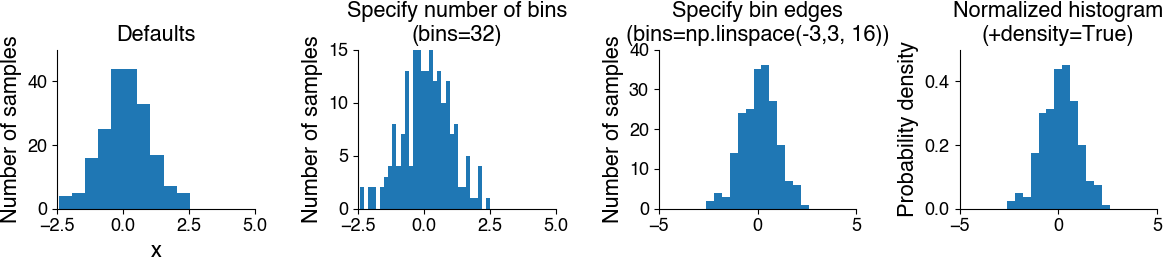

In [15]:
np.random.seed(1)  # for reproducibility
x = np.random.randn((200))  # generate 200 random numbers with standard normal distribion (mean 0, std 1)
# different ways of plotting histograms
plt.figure(figsize=(12, 3))
plt.subplot(141)
plt.hist(x)
plt.ylabel('Number of samples')
plt.xlabel('x')
plt.title('Defaults')

plt.subplot(142)
plt.hist(x, bins=32)
plt.ylabel('Number of samples')
plt.title('Specify number of bins\n(bins=32)')

plt.subplot(143)
plt.hist(x, bins=np.linspace(-3,3, 16))  #np.linspace(-3, 3, 64))
plt.ylabel('Number of samples')
plt.title('Specify bin edges\n(bins=np.linspace(-3,3, 16))')

plt.subplot(144)
plt.hist(x, bins=np.linspace(-3, 3, 16), density=True)
plt.ylabel('Probability density')
plt.title('Normalized histogram\n(+density=True)')

plt.tight_layout()
plt.savefig('fig/5.01_probabilities2.png')
plt.show()

### Mini-Exercise
You are given 10k samples from a probablility distribution

Visualize the data using a histogram with:
- no specification of the bin number and position
- 3 bins
- 32 bins
- 64 bins between 0 and 2

In [26]:
x = np.random.weibull(2, (10_000))  # generate 10k random numbers from a probability distribution

# your solution here

## Normal distribution
The _normal_ or _Gaussian_ distribution has a symmetrical, bell-like shape, with most data close to the mean and fewer values far away form the mean. They are fully described by their mean and standard deviation (std). Thus, if you know that something is normally distributed, all you need to (and can) know about your data are just these two numbers - mean and std. That's pretty neat!

This is the formula of the probability density function (PDF) of a Normal distribution:
$f(x | \mu, \sigma^2) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$

- $f(x | \mu, \sigma^2)$: The probability density function of the normal distribution with mean $\mu$ and variance $\sigma^2$, evaluated at a specific value x.
- $\mu$ (mu): The mean (average) of the normal distribution, which represents its central location.
- $\sigma$ (sigma): The standard deviation of the normal distribution, which represents its spread or dispersion.

This formula describes the shape of the normal distribution's probability density function, which is a symmetric, bell-shaped curve centered at the mean $\mu$, with the spread determined by the standard deviation $\sigma$. 

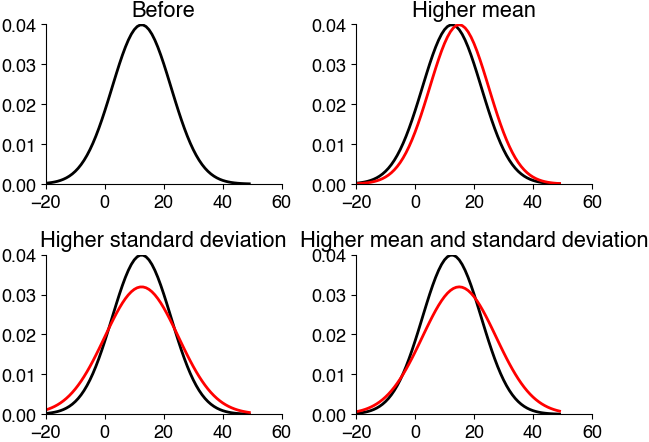

In [16]:

x = np.arange(-20, 50)
p0 = scipy.stats.norm.pdf(x, loc=12.5, scale=10)

plt.subplot(221)
plt.plot(x, p0, 'k-', lw=2)
plt.title("Before")

plt.subplot(222)
plt.plot(x, p0, 'k-', lw=2, label='frozen pdf')
plt.plot(x, scipy.stats.norm.pdf(x, loc=15, scale=10), 'r-', lw=2, label='frozen pdf')
plt.title("Higher mean")

plt.subplot(223)
plt.plot(x, p0, 'k-', lw=2, label='frozen pdf')
plt.plot(x, scipy.stats.norm.pdf(x, loc=12.5, scale=12.5), 'r-', lw=2, label='frozen pdf')
plt.title("Higher standard deviation")

plt.subplot(224)
plt.plot(x, p0, 'k-', lw=2, label='frozen pdf')
plt.plot(x, scipy.stats.norm.pdf(x, loc=15, scale=12.5), 'r-', lw=2, label='frozen pdf')
plt.title("Higher mean and standard deviation")
plt.tight_layout()
plt.savefig('fig/5.01_probabilities3.png')

plt.show()

## Generating random numbers in python
Using python, we can easily generate random numbers with a specified distribution:
- uniform: `np.random.random_sample(size=(100,))` draws samples from uniform distribution with bounds [0, 1) (0 is inclusive, 1 is not: $0\geq x<1$).
- random integers: `np.random.randint(low=4, high=10, size=(1,))` draws integers from a uniform distribution [low, high) (0 is inclusive, 1 is not: $0\geq x<1$).
- normal: `np.random.standard_normal(size)` draws samples from standard normal distribution with mean 0 and std 1.
- random order: `np.random.permutation(list)`

We will make use of this to illustrate a couple of concepts in statistics.

To get reproducible random numbers (everytime the same one), you can call `np.random.seed(seed)`. `seed` is an arbitrary integer and fixes the state of python's random number generator.


## Central limit theorem
Why are Normal distributions so important? They are everywhere.

According to the _central limit theorem_, even if the underlying distribition is not normal, the sums or means over samples from the distribution approaches a Normal distribution.

If we assume that each phenomenon arises from a combination of many independent processes, then we should expect most things to be normally distributed.

Take dice as an example: The pips are uniformly distributed - a fair dice will fall on one of its six sides with uniform probability $p=1/6$.
However, the mean (or sum) of the pips over N subsequent throws approaches a Normal distribution even for moderate N!

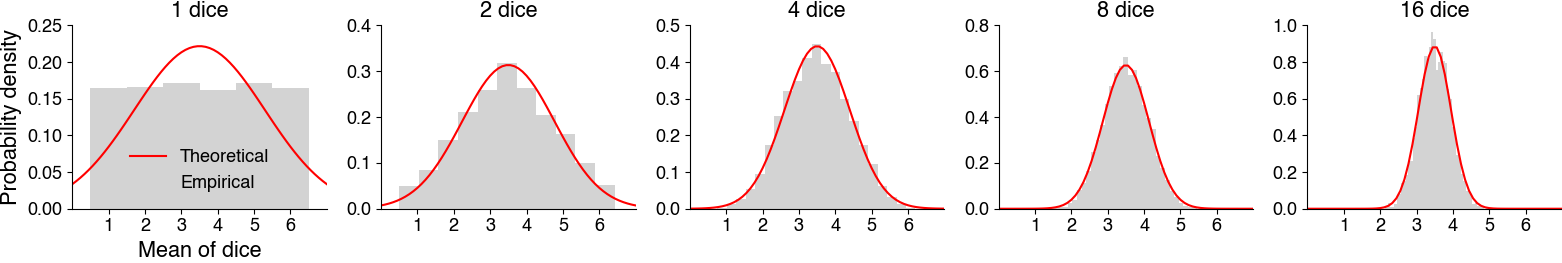

In [23]:
x = np.linspace(0, 7, 64)  # x-values for the theoretical pdf

plt.figure(figsize=(16, 3))
for cnt, N in enumerate([1, 2, 4, 8, 16]):
    numbers = np.random.randint(1, 7, (N, 5000))  # generate N sequences of numbers from 1 to 6 representing the pips, generate 5000 of those
    means = np.mean(numbers, axis=0)  # compute the mean along axis 0 - over the N sequences - this will result in 5000 mean values
    plt.subplot(1, 5, cnt+1)
    plt.hist(means, bins=np.linspace(1, 8, max(8, N * 7)) - 0.5, density=True, color='lightgrey')
    plt.xlim(0, 7)
    plt.xticks(np.arange(1, 7))
    theoretical_dist = scipy.stats.norm.pdf(x, loc=3.5, scale=1.8/np.sqrt(N))  # generate theoretical distribution of means following normal pdf
    plt.plot(x, theoretical_dist, c='r')
    plt.title(f"{N} dice")
    if cnt == 0:
        plt.ylabel('Probability density')
        plt.xlabel('Mean of dice')
        plt.legend(['Theoretical', 'Empirical'])
plt.tight_layout()
plt.savefig('fig/5.01_probabilities4.png')

plt.show()

## Empirical mean and standard deviation
When we define a probability distribution, for instance a Normal distribution, we can specify it's mean and standard deviation - these values are also called the _theoretical_ mean and standard deviation.

But for a dataset with samples $x_1, x_2, \ldots, x_n$ we do not know the mean and standard deviation of the underlying probability density function.

However, we can calculate the _empirical_ mean and standard deviation of any distribution (not just a Normal one) using the following formulas:

The __empirical mean__ (often denoted as $\bar{x}$) is calculated as: $\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$

- $\bar{x}$ represents the empirical mean or average.
- $n$ is the number of data points in the dataset.
- $x_i$ represents individual data points in the dataset, indexed from 1 to $n$.
- $\sum_{i=1}^{n}$ denotes summation, indicating that you should sum all the data points.

The __empirical standard deviation__ (often denoted as $s$) is calculated as: $s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}$

- $s$ represents the empirical standard deviation.
- $n$ is the number of data points in the dataset.
- $\bar{x}$ is the empirical mean or average (calculated as shown above).
- $x_i$ represents individual data points in the dataset, indexed from 1 to $n$.
- $\sum_{i=1}^{n}$ denotes summation, indicating that you should sum all the squared differences between each data point and the mean.


## Effect of sample size
How close the empirical mean and standard deviation are to their true values depends on the sample size: The larger the sample size, the closer (more accurate) your estimates will be to the true values. With few samples, random outliers will strongly influence and distort the estimates. 

This is captured by the _law of large numbers_: It states that with increasing sample size $N$, the empirical mean (the average of the samples) tends towards the theoretical mean (the true mean of the underlying distribution). In other words: The more samples, the more the frequency of an observed event approaches the actual probability of occurrence (the probability that is theoretically expected based on the underlying probability distribution).

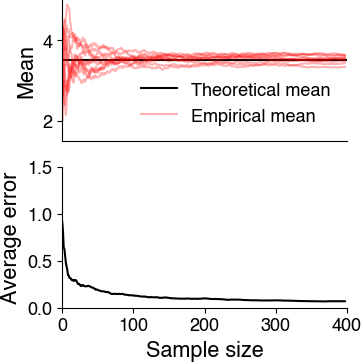

In [3]:
plt.figure(figsize=(4, 4))
np.random.seed(4)
nb_samples = 400
nb_trials = 100
data = np.random.randint(1, 7, (nb_samples, nb_trials)).astype(float)
cum_mean = np.zeros_like(data)

for N in range(2, nb_samples):
    cum_mean[N, :] = np.mean(data[:N, :], axis=0)

plt.subplot(211)
plt.axhline(3.5, c='k')
plt.plot(cum_mean[2:, ::10], c='r', alpha=0.3)
plt.ylabel('Mean')
plt.ylim(1.5, 5)
plt.xticks([])
plt.legend(['Theoretical mean', 'Empirical mean'])

plt.subplot(212)
# plt.plot(np.abs(cum_mean[2:] - 3.5), c='r', alpha=0.3)
plt.plot(np.mean(np.abs(cum_mean[2:] - 3.5), axis=1), c='k')
plt.ylim(0, 1.5)
plt.ylabel('Average error')
plt.xlabel('Sample size')
plt.tight_layout()

plt.savefig('fig/5.01_probabilities5.png')



## Standard error of the mean
The standard error of the mean measures how well the available sample size allows to estimate the mean expected for the entire population (the true mean of the underlying distribution). The idea of this measure is the following: Imagine you draw N samples from the entire population and you calculate the empirical mean from the samples. That empirical mean will be different for different sets of N samples, depending on which individuals you measured (e.g. in one sample are a couple of very large individuals, and in another sample some particularly small individuals). The standard error of the mean measures how much the empirical means from different sets of samples of the same size will scatter.

The standard error of the mean (SEM) is defined as: $\sigma_{\bar{x}} = \sigma / \sqrt{N}$

- $\sigma$: The theoretical standard deviation (the std of the underlying probability distribution)  - the more variable the underlying distribution, the less certain the mean will be.
- $N$: size of samples (not the number of samples - sample size corresponds roughly to the number of _independent_ samples - if you measure the blood pressure in 10 mice, 10 times in a row, then you will have 100 samples but they are not all independent). Since $N$ is in the denominator, the SEM shrinks with sample size. But, because of the square root, not linearly but with "diminishing returns" - doubling the sample size does not half the SEM.


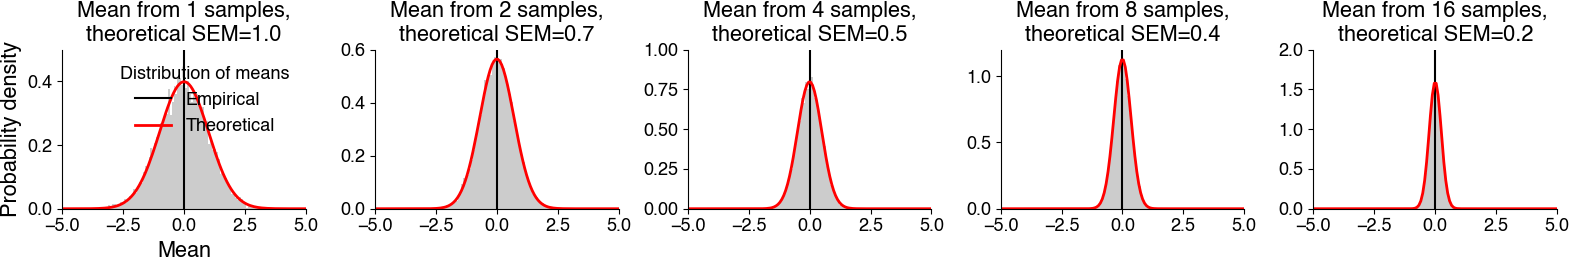

In [ ]:
bins = np.linspace(-5, 5, 128)

plt.figure(figsize=(16, 3))
for cnt, N in enumerate([1, 2, 4, 8, 16]):
    plt.subplot(1, 5, cnt+1)
    plt.hist(np.mean(np.random.randn(N, 10000), axis=0), bins=bins, density=True, alpha=0.2, color='k')
    plt.axvline(0, c='k')
    plt.plot(bins, scipy.stats.norm.pdf(bins, loc=0, scale=1/np.sqrt(N)), 'r-', lw=2, label='frozen pdf')
    plt.title(f"Mean from {N} samples,\ntheoretical SEM={1/np.sqrt(N):1.1f}")
    if cnt == 0:
        plt.ylabel('Probability density')
        plt.xlabel('Mean')
        plt.legend(['Empirical', 'Theoretical'], title='Distribution of means')
plt.tight_layout()
plt.savefig('fig/5.01_probabilities6.png')


## Plots with error bars
Plots with error bars can be generated using `plt.errorbar(x, y, yerr)` ([docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html)).

`yerr` can be anything but is typically either the standard error of the mean (SEM) or the standard deviation. These two measures mean fundamentally different things:

- _SEM_: How confident you should be about the plotted mean. This can be useful for comparing means. It decreases with sample size.
- _STD_: How widely distributed your data is. This tells you something about the data distribution and is independent of sample size.

If you see a plot with error bars, always check what they mean. And think carefully about what measure you want to choose when plotting error bars yourself.

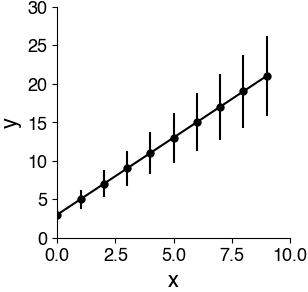

In [21]:
# generate toy data
x = np.arange(0, 10)
y = 2 * x + 3
yerr = y / 4

# make a plot with error bars
plt.figure(figsize=(3, 3))
plt.errorbar(x, y, yerr, c='k', fmt='o-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

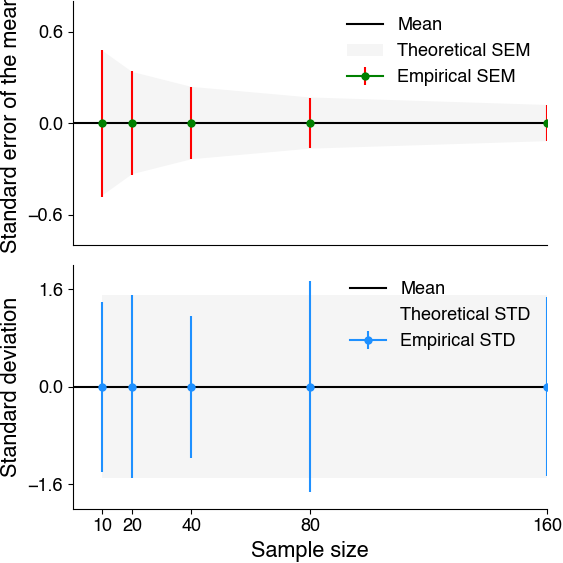

In [20]:
std_theoretical = 1.5
Ns = np.array([10, 20, 40, 80, 160])

plt.figure(figsize=(6, 6))

plt.subplot(211)
plt.axhline(0, c='k')
plt.fill_between(Ns, std_theoretical / np.sqrt(Ns), -std_theoretical / np.sqrt(Ns), facecolor='whitesmoke')
plt.ylabel('Standard error of the mean')

plt.subplot(212)
plt.axhline(0, c='k')
plt.fill_between(Ns, std_theoretical, -std_theoretical, facecolor='whitesmoke')
plt.ylabel('Standard deviation')
plt.xlabel('Sample size')

for cnt, N in enumerate(Ns):
    data = np.random.randn(N, 1000) * std_theoretical
    sem_empirical = np.std(np.mean(data, axis=0))
    sem_theoretical = std_theoretical / np.sqrt(N)
    std_empirical = np.std(data[:,0])

    plt.subplot(211)
    plt.errorbar(N, 0, sem_empirical, marker='o', color='green', ecolor='red')

    plt.subplot(212)
    plt.errorbar(N, 0, std_empirical, marker='o', color='dodgerblue')

plt.subplot(211)
plt.legend(['Mean', 'Theoretical SEM', 'Empirical SEM'], frameon=False)
plt.ylim(-0.8, 0.8)
plt.yticks(np.arange(-0.6, 0.61, 0.6))
plt.xticks([])

plt.subplot(212)
plt.legend(['Mean', 'Theoretical STD', 'Empirical STD'], frameon=False)
plt.ylim(-2, 2)
plt.yticks(np.arange(-1.6, 1.61, 1.6))
plt.xticks(Ns)

plt.tight_layout()
plt.savefig('fig/5.01_probabilities7.png')
plt.show()